In [1]:
#-*- coding: utf-8 -*-
import glob
import json

In [2]:
!git clone https://github.com/chinese-poetry/chinese-poetry

Cloning into 'chinese-poetry'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 5801 (delta 1), reused 3 (delta 1), pack-reused 5791
Receiving objects: 100% (5801/5801), 186.29 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (4501/4501), done.
Checking out files: 100% (1372/1372), done.


In [3]:
!pip install opencc

     |████████████████████████████████| 1.3MB 5.8MB/s 


In [9]:
# 词 is located under ~/chinese-poetry/ci
# 诗 is located under ~/chinese-poetry/json
# poet name could be in 繁體 or 简体 so its better to search for both
import opencc
converter_t2s = opencc.OpenCC('t2s.json')
converter_s2t = opencc.OpenCC('s2t.json')
# 摘出某个诗人的诗
poet_name_simple = "王安石"
poet_name = [poet_name_simple, converter_s2t.convert(poet_name_simple)]
dynasty = "song" # choice from ["tang", "song"]
shiciji_file_name = poet_name_simple
shiciji = []
for p_name in poet_name:
    files = glob.glob("./chinese-poetry/json/poet.{}*.json".format(dynasty))
    files1 = glob.glob("./chinese-poetry/ci/*.json")
    files.extend(files1)
    fo = open(shiciji_file_name, 'w')
    for file in files:
        with open(file) as fi:
            fi_json = json.load(fi)
            for poem in fi_json:
                if 'author' in poem and poem["author"] == p_name:
                    shiciji.append(converter_t2s.convert("".join(poem["paragraphs"])))


print(len(shiciji))
for item in shiciji:
    fo.write(item)
    fo.write("\n")

3538


In [5]:
!pip install jieba

In [6]:
!pip install wordcloud

In [7]:
!git clone https://github.com/MerakDipper/shiyun.git

Cloning into 'shiyun'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


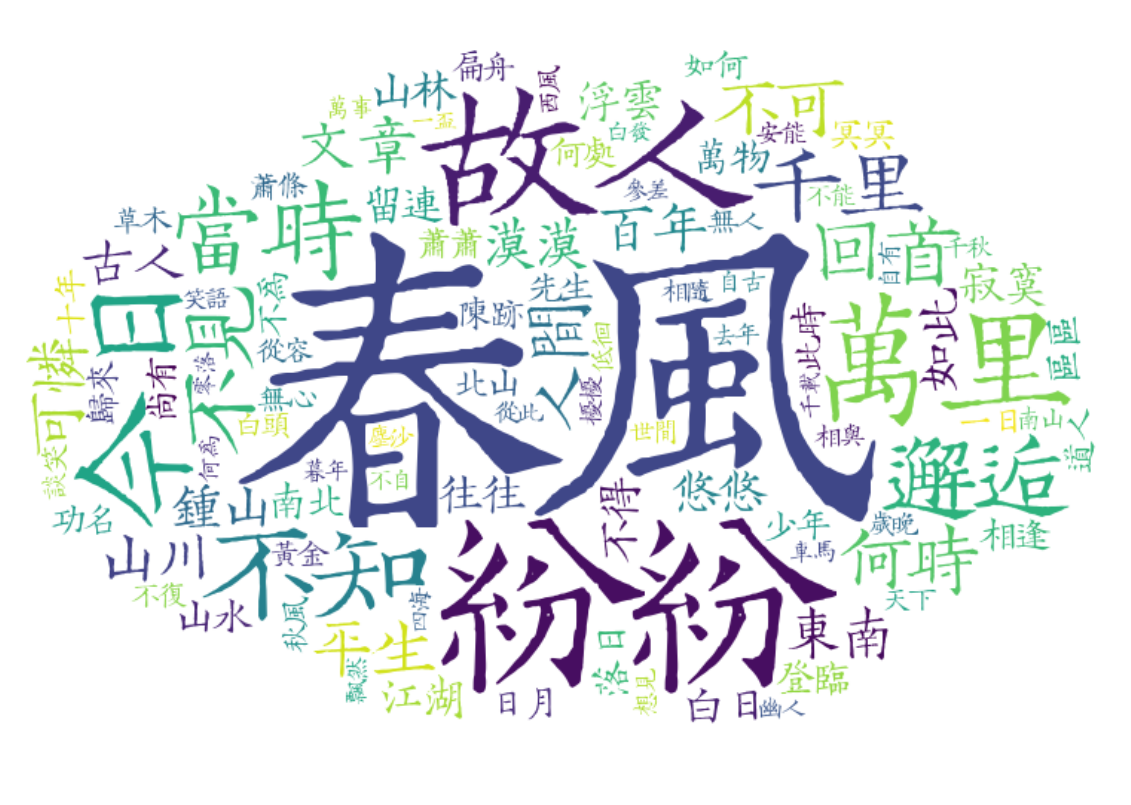

In [15]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
plt.rcParams['figure.dpi']= 250
#stopwords is NOT working properly for now.
#stopwords = set()
#stopwords.add("故人")
#stopwords.add("不可")
poet_text_path = './'+poet_name_simple
text_from_file_with_apath = open(poet_text_path).read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

back_img = np.array(Image.open("./shiyun/cloud5.png"))
my_wordcloud = WordCloud(font_path="./shiyun/ZiYueSongKeBenJianTi-2.ttf",
                           background_color="white",
                           max_words=100,
                           max_font_size=200,
                           width=1280,
                           #stopwords=stopwords,
                           mask=back_img,
                           height=800).generate(wl_space_split)

plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()